In [37]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# **Histogram**

## OpenCV

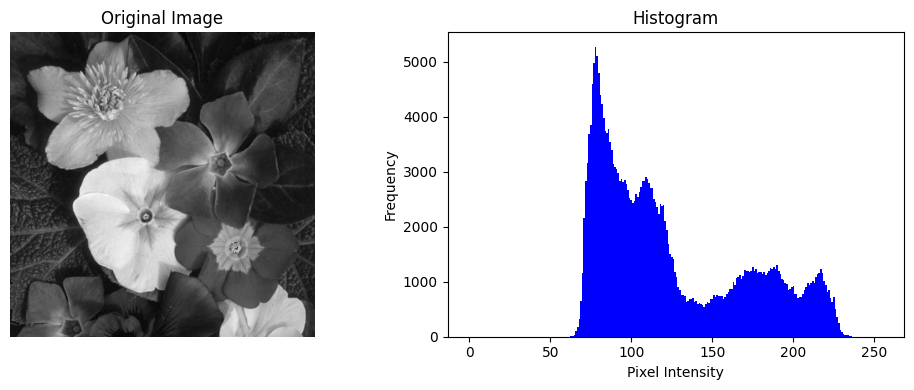

In [44]:
import cv2
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread("images/ace.jpg", cv2.IMREAD_GRAYSCALE)

# Compute histogram using OpenCV
hist = cv2.calcHist([img], [0], None, [256], [0,256])

# Plot image and histogram
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.bar(range(256), hist.ravel(), width=1.0, color='blue')
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Manual 

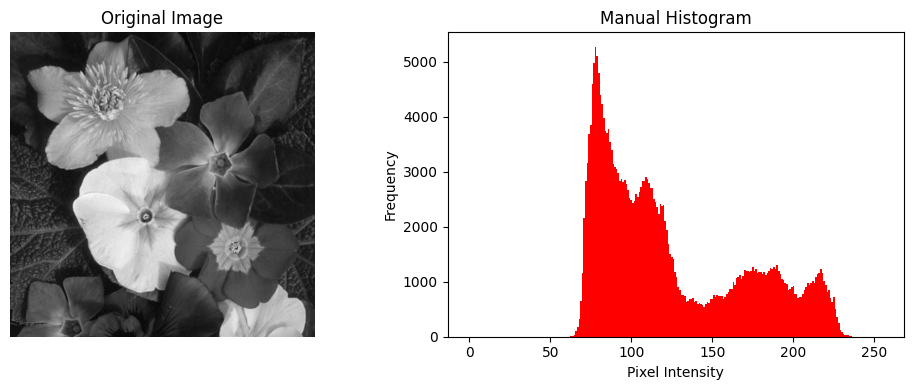

In [46]:
import cv2
import matplotlib.pyplot as plt


hist = [0] * 256

for row in img:        
    for pixel in row:    
        hist[pixel] = hist[pixel] + 1  

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Manual Histogram")
plt.bar(range(256), hist, width=1.0, color='red')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# **Histogram Equalization**

## OpenCV

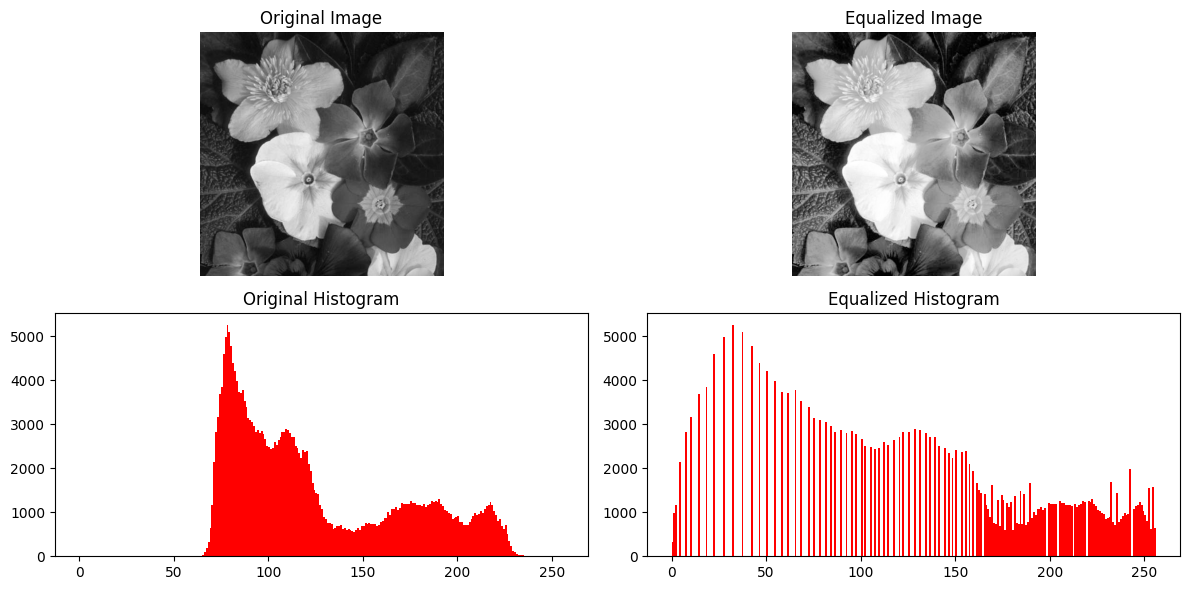

In [40]:
import cv2
import matplotlib.pyplot as plt

# Apply histogram equalization
equalized = cv2.equalizeHist(img)

# Plot images and histograms
plt.figure(figsize=(12,6))

# Original image
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

# Equalized image
plt.subplot(2,2,2)
plt.title("Equalized Image")
plt.imshow(equalized, cmap="gray")
plt.axis("off")

# Original histogram
plt.subplot(2,2,3)
plt.title("Original Histogram")
plt.hist(img.ravel(), 256, [0,256],color='red')

# Equalized histogram
plt.subplot(2,2,4)
plt.title("Equalized Histogram")
plt.hist(equalized.ravel(), 256, [0,256],color='red')

plt.tight_layout()
plt.show()


## Manual

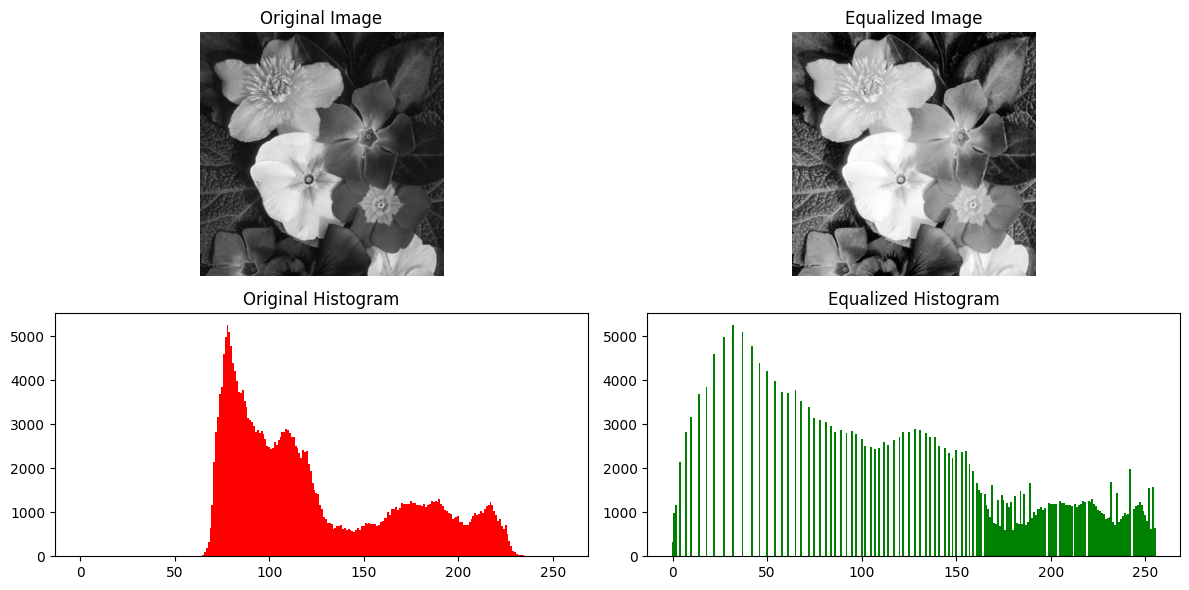

In [41]:
import cv2
import matplotlib.pyplot as plt

# 2. Initialize histogram array
hist = [0] * 256

# 3. Calculate histogram manually
for row in img:
    for pixel in row:
        hist[pixel] = hist[pixel] + 1

# 4. Calculate CDF (Cumulative Distribution Function)
cdf = [0] * 256
cdf[0] = hist[0]
for i in range(1, 256):
    cdf[i] = cdf[i-1] + hist[i]

# 5. Normalize CDF to map to 0-255
cdf_min = 0
# find first non-zero cdf value
for value in cdf:
    if value != 0:
        cdf_min = value
        break

num_pixels = len(img) * len(img[0])
cdf_normalized = [0] * 256
for i in range(256):
    # histogram equalization formula
    cdf_normalized[i] = round((cdf[i] - cdf_min) * 255 / (num_pixels - cdf_min))

# 6. Create equalized image
equalized_img = []
for row in img:
    new_row = []
    for pixel in row:
        new_pixel = cdf_normalized[pixel]  # map old pixel to new pixel
        new_row.append(new_pixel)
    equalized_img.append(new_row)

# 7. Plot original and equalized image and histograms
plt.figure(figsize=(12,6))

# Original image
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

# Equalized image
plt.subplot(2,2,2)
plt.title("Equalized Image")
plt.imshow(equalized_img, cmap="gray")
plt.axis("off")

# Original histogram
plt.subplot(2,2,3)
plt.title("Original Histogram")
plt.bar(range(256), hist, width=1.0, color='red')

# Equalized histogram
# Recalculate histogram of equalized image
hist_eq = [0] * 256
for row in equalized_img:
    for pixel in row:
        hist_eq[pixel] += 1

plt.subplot(2,2,4)
plt.title("Equalized Histogram")
plt.bar(range(256), hist_eq, width=1.0, color='green')

plt.tight_layout()
plt.show()
